# Домашнее задание

# Аугментация изображений

Применить различные методы аугментации для работы с изображениями с использованием библиотеки torchvision. Цель — улучшить вариативность данных и повысить устойчивость будущих модели. Выбрать 5 аугментаций из документации библиотеки torchvision - https://pytorch.org/vision/stable/transforms.html, применить их и сделайть выводы.

# Примеры аугментаций

Resize: Изменение размера изображения до указанного размера.
RandomShortestSize: Преобразование размера изображения до случайной минимальной стороны, оставляя пропорции.
RandomHorizontalFlip: Случайное отражение изображения по горизонтали с вероятностью 50%.
Pad: Добавление паддинга (отступов) вокруг изображения.
RandomAffine: Случайное аффинное преобразование (масштабирование, повороты, смещения).
RandomSolarize: Солнечная коррекция изображения, которая меняет яркость пикселей выше определённого порога.
ColorJitter: Изменение яркости, контраста и насыщенности изображения.
RandomRotation: Случайное вращение изображения на угол от 0 до 30 градусов.
RandomCrop: Случайное обрезание изображения до меньшего размера.
GaussianBlur: Применение гауссового размытия.
Инструкция

Выбор аугментаций. Из списка выше или официальной документации библиотеки torchvision выбрать 5 различных аугментаций. Постараться выбрать различные типы аугментаций (например, изменение размера, поворот, цветовая коррекция и т.д.).
Реализовать пайплайн аугментаций
Использовать класс библиотеки torchvision.transforms, чтобы создать пайплайн аугментаций, который будет применяться к изображению.
Применять аугментации к изображению и отображать его перед и после изменений.
Вывод. Написать выводы.

In [1]:
# Подавление предупреждений
import warnings

for warn in [UserWarning, FutureWarning]: warnings.filterwarnings("ignore", category=warn)

import os
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import jupyterlab as jlab

from dataclasses import dataclass

In [2]:
# проверим версии как в лекции
packages = [
    "Torch", "NumPy", "Pandas", "JupyterLab",
]

package_objects = [
    torch, np, pd, jlab
]

versions = list(map(lambda obj: obj.__version__, package_objects))

pkgs = {"Библиотека": packages, "Версия": versions}
df_pkgs = pd.DataFrame(data=pkgs)
df_pkgs.index.name = "№"
df_pkgs.index += 1

display(df_pkgs)

path_to_reqs = "."
reqs_name = "requirements.txt"


def get_packages_and_versions():

    for package, version in zip(packages, versions):
        yield f"{package.lower()}=={version}\n"


with open(os.path.join(path_to_reqs, reqs_name), "w", encoding="utf-8") as f:
    f.writelines(get_packages_and_versions())

,Библиотека,Версия
№,,
1,Torch,2.7.0
2,NumPy,2.2.6
3,Pandas,2.2.3
4,JupyterLab,4.4.3


In [8]:
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from torchvision import transforms

IMG_PATH = "test_img.png"  # гружу файл
if not Path(IMG_PATH).is_file():
    raise FileNotFoundError(f"file {IMG_PATH} not found")

img = Image.open(IMG_PATH).convert("RGB")

steps = [  # список аугментаций
    ("Resize", transforms.Resize((256, 256))),
    ("RandomHorizontalFlip", transforms.RandomHorizontalFlip(p=1.0)),
    ("RandomRotation", transforms.RandomRotation(30)),
    ("ColorJitter", transforms.ColorJitter(
        brightness=0.4, contrast=0.4,
        saturation=0.4, hue=0.1)),
    ("GaussianBlur", transforms.GaussianBlur(kernel_size=5,
                                             sigma=(0.1, 5.0))),
]


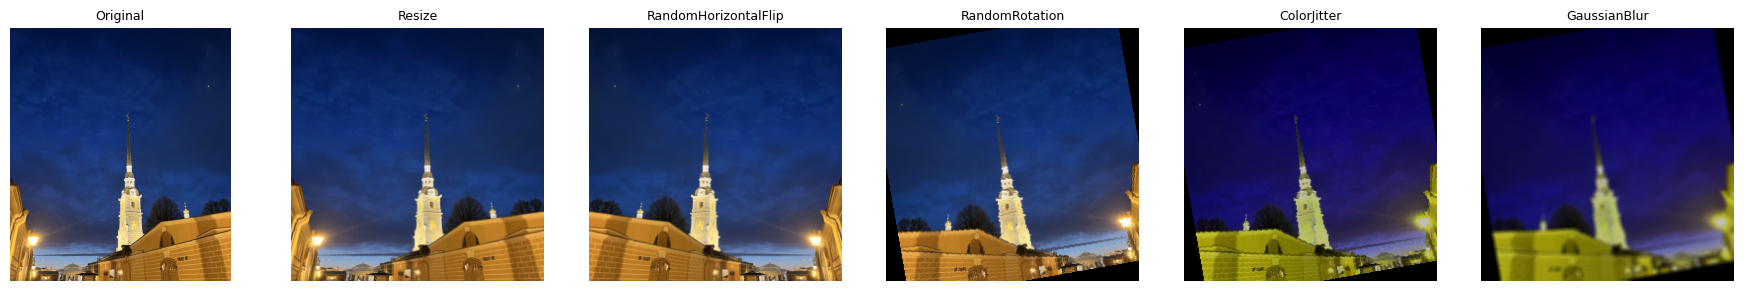

In [9]:
# визуализация
images = [img]
titles = ["Original"]

tmp = img
for name, aug in steps:
    tmp = aug(tmp)
    images.append(tmp)
    titles.append(name)

fig, axes = plt.subplots(1, len(images), figsize=(3 * len(images), 3))
for ax, im, title in zip(axes, images, titles):
    ax.imshow(im)
    ax.set_title(title, fontsize=9)
    ax.axis("off")

plt.tight_layout()
plt.show()

Последовательный пайплайн (Resize -> Flip -> Rotation -> Color -> Blur) делает так, что модель видит более реальный мир, где камера может трястись, освещение плавать, а объект может быть наклонен.
Стохастичность -> регуляризация. Каждый запуск порождает новый пример, что работает как data-dropout — модель меньше запоминает конкретные пиксели, больше учится абстрактным признакам.

Flip + Rotation + Resize дают инвариантность к положению камеры и масштабу.
ColorJitter дает устойчивость к освещению.
GaussianBlur дает устойчивость к фокусу/смазу.
Такая комбинация улучшает обобщающую способность модели.